In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage.measure as measure
import glob
import os

In [44]:
def txt2labelarray(txtFile, size):
    true_boxes = []

    with open(txtFile) as f:
        for cnt, line in enumerate(f):
            c,x,y,w,h = map(float, line.split())
            x = x*size
            y = y*size
            w = w*size
            h = h*size
            x1 = x - w/2
            x2 = x + w/2
            y1 = y - h/2
            y2 = y + h/2
            lis_for_each_sample = []
            lis_for_each_sample.append(0)
            lis_for_each_sample.append(x1)
            lis_for_each_sample.append(y1)
            lis_for_each_sample.append(x2)
            lis_for_each_sample.append(y2)
            
            true_boxes.append(lis_for_each_sample)
        labels = np.asarray(true_boxes)
    return labels

In [52]:

def entropy_split(image, labels):
    entropys = []
    for idx in range(labels.shape[0]):
        label = labels[idx]
        image_crop = image[int(label[2]):int(label[4]), int(label[1]):int(label[3]),:]
        # cv2.imwrite(str(exp_time)+".png", image_crop)
        entropy = measure.shannon_entropy(image_crop)
        entropys.append(entropy)

    return entropys

In [36]:
# Plot for each image length
label_path = "/home/aru/phd/objective2/paper_review/images/55/500.txt"
label = txt2labelarray(label_path)
label

array([[  0.      , 460.000256, 415.999488, 492.000256, 598.999552]])

In [10]:
power_list = [100, 500, 1000, 5000, 10000, 50000, 100000]
entropy_list = []
for img_path in glob.glob("/home/aru/phd/objective2/paper_review/images/55/*.png"):
    img = cv2.imread(img_path)
    img_name = os.path.basename(img_path).split(".")[0]
    entropy = entropy_split(img, label)
    entropy_list.append([int(img_name), entropy[0]])

In [11]:
entropy_arr = np.array(entropy_list)

In [14]:
entropy_arr

array([[1.00000000e+03, 6.92244219e+00],
       [1.00000000e+05, 3.44897476e-01],
       [5.00000000e+02, 7.21513563e+00],
       [1.00000000e+02, 7.11118774e+00],
       [1.00000000e+04, 4.66506530e+00],
       [5.00000000e+04, 2.15109837e+00],
       [5.00000000e+03, 5.52028345e+00]])

In [18]:
sorted_arr = np.sort(entropy_arr, axis=0)

In [19]:
sorted_arr.shape

(7, 2)

In [22]:
sorted_arr

array([[1.00000000e+02, 3.44897476e-01],
       [5.00000000e+02, 2.15109837e+00],
       [1.00000000e+03, 4.66506530e+00],
       [5.00000000e+03, 5.52028345e+00],
       [1.00000000e+04, 6.92244219e+00],
       [5.00000000e+04, 7.11118774e+00],
       [1.00000000e+05, 7.21513563e+00]])

In [20]:
sorted_arr[:,0]

array([   100.,    500.,   1000.,   5000.,  10000.,  50000., 100000.])

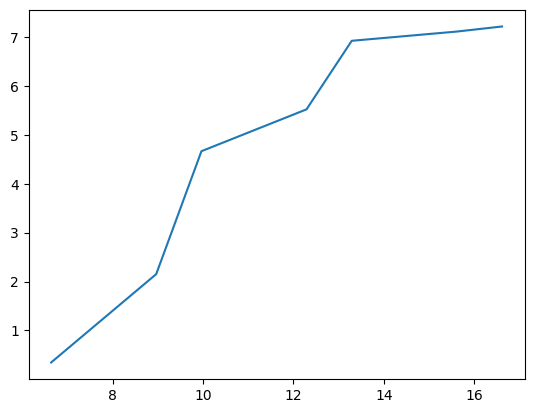

In [21]:
plt.plot(np.log2(sorted_arr[:,0]), sorted_arr[:,1])

In [31]:
power_list = [100, 500, 1000, 5000, 10000, 50000, 100000]
entropy_list = []
for img_path in glob.glob("/home/aru/phd/objective2/paper_review/images/straight/15/*.png"):
    img = cv2.imread(img_path)
    img_name = os.path.basename(img_path).split(".")[0]
    entropy = entropy_split(img, label)
    entropy_list.append([int(img_name), entropy[0]])

In [32]:
entropy_arr15 = np.array(entropy_list)

In [33]:
sorted_arr15 = np.sort(entropy_arr15, axis=0)
sorted_arr15

array([[1.00000000e+02, 3.05074261e-01],
       [5.00000000e+02, 2.08020341e+00],
       [1.00000000e+03, 4.64797628e+00],
       [5.00000000e+03, 5.54682048e+00],
       [1.00000000e+04, 6.94229091e+00],
       [5.00000000e+04, 7.10409264e+00],
       [1.00000000e+05, 7.19938461e+00]])

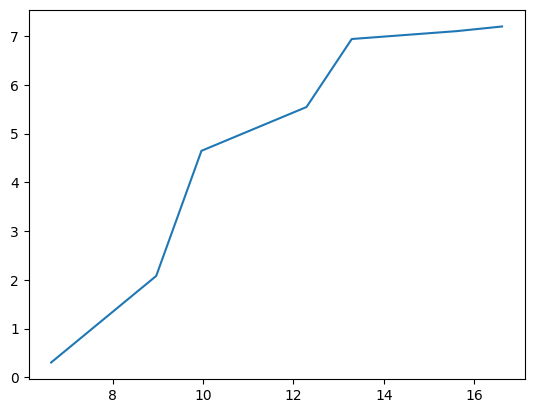

In [34]:
plt.plot(np.log2(sorted_arr15[:,0]), sorted_arr15[:,1])

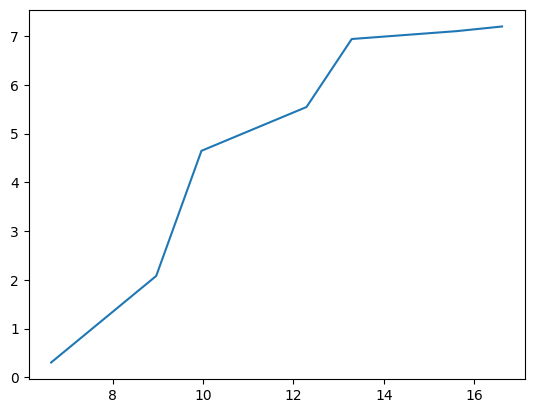

In [35]:
entropy_list = []
for img_path in glob.glob("/home/aru/phd/objective2/paper_review/images/straight/15/*.png"):
    img = cv2.imread(img_path)
    img_name = os.path.basename(img_path).split(".")[0]
    entropy = entropy_split(img, label)
    entropy_list.append([int(img_name), entropy[0]])
entropy_arr47 = np.array(entropy_list)
sorted_arr47 = np.sort(entropy_arr47, axis=0)
sorted_arr47
plt.plot(np.log2(sorted_arr47[:,0]), sorted_arr47[:,1])

In [45]:
label_path = "/home/aru/phd/objective2/paper_review/images/straight/47/pbrt/3b.txt"
label = txt2labelarray(label_path, 700)
label

array([[  0.     , 148.9999 , 273.99995, 551.9997 , 426.99965]])

array([[1.        , 0.        ],
       [2.        , 0.08024337],
       [3.        , 0.08701583],
       [4.        , 5.94496658],
       [5.        , 7.07832066]])

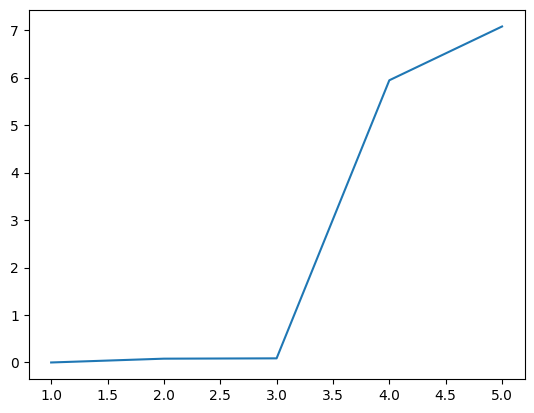

In [46]:
entropy_list = []
names = ["30m", "300m", "3b", "30b", "300b"]
for img_path in glob.glob("/home/aru/phd/objective2/paper_review/images/straight/15/pbrt/*.png"):
    img = cv2.imread(img_path)
    img_name = os.path.basename(img_path).split(".")[0]
    entropy = entropy_split(img, label)
    idx = names.index(img_name)
    entropy_list.append([idx+1, entropy[0]])
entropy_arr15 = np.array(entropy_list)
sorted_arr15 = np.sort(entropy_arr15, axis=0)

plt.plot(sorted_arr15[:,0], sorted_arr15[:,1])
sorted_arr15

In [47]:
imgs_path = "/home/aru/phd/objective2/paper_review/images/straight/15/pbrt"
names = ["30m", "300m", "3b", "30b", "300b"]

In [48]:
for img_name in names:
    img_path = imgs_path + img_name + ".png"
    img = cv2.imread(img_path)
    print(img.shape)
    entropy = 

SyntaxError: invalid syntax (2941371971.py, line 5)

In [49]:
label_path = "/home/aru/phd/objective2/paper_review/images/straight/47/blender/100.txt"
label = txt2labelarray(label_path, 1024)
label

array([[  0.      , 461.000192, 423.000064, 491.999744, 604.000256]])

In [63]:
entropy_list = []
for img_path in glob.glob("/home/aru/phd/objective2/paper_review/images/straight/15/blender/*.png"):
    img = cv2.imread(img_path)
    img_name = os.path.basename(img_path).split(".")[0]
    entropy = entropy_split(img, label)
    entropy_list.append([int(img_name), entropy[0]])
entropy_arr47 = np.array(entropy_list)
sorted_arr47 = np.sort(entropy_arr47, axis=0)
sorted_arr47


array([[1.00000000e+02, 0.00000000e+00],
       [1.00000000e+03, 3.06578638e+00],
       [1.00000000e+04, 6.08924847e+00],
       [1.00000000e+05, 7.16904541e+00]])

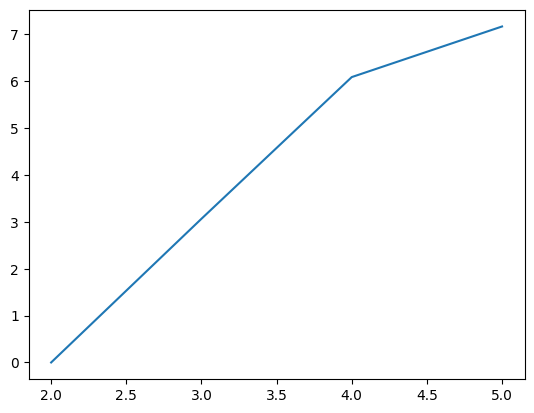

In [64]:
plt.plot(np.log10(sorted_arr47[:,0]), sorted_arr47[:,1])

1000
7.325477874278836
100000
2.5287988099029026
100
6.46332606414184
10000
6.298916324621873


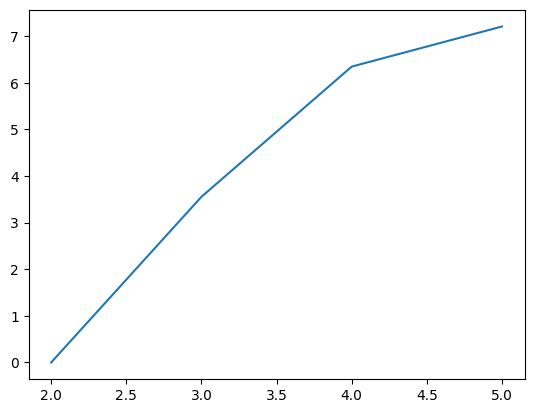

In [67]:
entropy_list = []
for img_path in glob.glob("/home/aru/phd/objective2/paper_review/images/straight/47/blender/*.png"):
    img = cv2.imread(img_path)
    img_name = os.path.basename(img_path).split(".")[0]
    ent = measure.shannon_entropy(img)
    print(img_name)
    print(ent)
    entropy = entropy_split(img, label)
    entropy_list.append([int(img_name), entropy[0]])
entropy_arr47 = np.array(entropy_list)
sorted_arr47 = np.sort(entropy_arr47, axis=0)
sorted_arr47
plt.plot(np.log10(sorted_arr47[:,0]), sorted_arr47[:,1])

In [60]:
np.log10(sorted_arr47[:,0])

array([2., 3., 4., 5.])

In [68]:
img = cv2.imread("/home/aru/phd/objective2/paper_review/images/straight/47/blender/1000.png")

In [73]:
image_crop = img[int(label[0][2]):int(label[0][4]), int(label[0][1]):int(label[0][3]),:]
cv2.imshow("dd",image_crop)

QObject::moveToThread: Current thread (0x55ea46272660) is not the object's thread (0x55ea4623b0f0).
Cannot move to target thread (0x55ea46272660)

QObject::moveToThread: Current thread (0x55ea46272660) is not the object's thread (0x55ea4623b0f0).
Cannot move to target thread (0x55ea46272660)

QObject::moveToThread: Current thread (0x55ea46272660) is not the object's thread (0x55ea4623b0f0).
Cannot move to target thread (0x55ea46272660)

QObject::moveToThread: Current thread (0x55ea46272660) is not the object's thread (0x55ea4623b0f0).
Cannot move to target thread (0x55ea46272660)

QObject::moveToThread: Current thread (0x55ea46272660) is not the object's thread (0x55ea4623b0f0).
Cannot move to target thread (0x55ea46272660)

QObject::moveToThread: Current thread (0x55ea46272660) is not the object's thread (0x55ea4623b0f0).
Cannot move to target thread (0x55ea46272660)

QObject::moveToThread: Current thread (0x55ea46272660) is not the object's thread (0x55ea4623b0f0).
Cannot move to tar